# SkLearn

- Scikit learn 也简称 sklearn, 是机器学习领域当中最知名的 python 模块之一
- 官网：<https://scikit-learn.org/>
- SkLearn 包含了很多种机器学习的方式:
  - Preprocessing 数据预处理
  - Classification 分类
  - Regression 回归
  - Clustering 非监督分类
  - Dimensionality reduction 数据降维
  - Model Selection 模型选择


方法的选择

从 START 开始，首先看数据的样本是否 >50，小于则需要收集更多的数据。

由图中，可以看到算法有四类，分类，回归，聚类，降维。

其中 分类和回归是监督式学习，即每个数据对应一个 label。 聚类 是非监督式学习，即没有 label。 另外一类是 降维，当数据集有很多很多属性的时候，可以通过 降维 算法把属性归纳起来。例如 20 个属性只变成 2 个，注意，这不是挑出 2 个，而是压缩成为 2 个，它们集合了 20 个属性的所有特征，相当于把重要的信息提取的更好，不重要的信息就不要了。

然后看问题属于哪一类问题，是分类还是回归，还是聚类，就选择相应的算法。 当然还要考虑数据的大小，例如 100K 是一个阈值。

可以发现有些方法是既可以作为分类，也可以作为回归，例如 SGD。

常规流程

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_boston, load_iris, load_digits, make_classification, make_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC


In [3]:
iris = load_iris()

# 查看数据集描述
print(iris.DESCR)

X = iris.data
y = iris.target
print(X)
print(y)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [5]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print(knn.predict(X_test))
print(y_test)

[2 0 2 1 0 1 0 0 1 1 2 1 2 1 0 2 0 0 1 0 2 1 0 2 1 1 0 2 2 0 2 2 2 0 0 2 2
 2 1 0 1 0 2 1 2]
[2 0 2 1 0 1 0 0 1 2 2 1 2 1 0 2 0 0 1 0 2 1 0 2 1 1 0 2 2 0 2 2 2 0 0 2 2
 2 1 0 1 0 2 2 2]


In [6]:
acc = accuracy_score(y_test, knn.predict(X_test))
print(acc)

0.9555555555555556


假数据

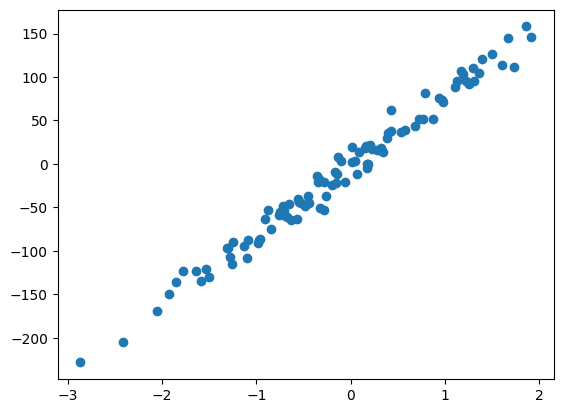

In [7]:
X, y = make_regression(n_samples=100, n_features=1, n_targets=1, noise=10)
plt.scatter(X, y)
plt.show()

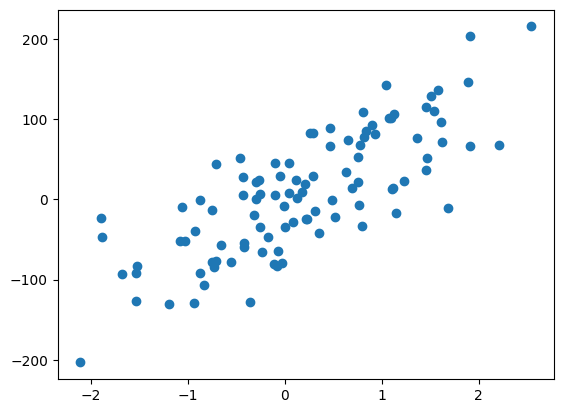

In [8]:
X, y = make_regression(n_samples=100, n_features=1, n_targets=1, noise=50)
plt.scatter(X, y)
plt.show()

内置数据集

In [9]:
loaded_data = load_boston()
X = loaded_data.data
y = loaded_data.target

print(X)
print(X.shape)
print(y)
print(y.shape)

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]
(506, 13)
[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.

c:\Users\dikli\scoop\apps\miniconda3\current\envs\algorithm\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets includ

训练和预测

In [15]:
model = LinearRegression()

model.fit(X, y)
print(y[:4])
print(model.predict(X[:4, :]))

[24.  21.6 34.7 33.4]
[30.00384338 25.02556238 30.56759672 28.60703649]


In [16]:
# 返回各特征的系数,绝对值大小可以理解成特征重要性
print(model.coef_)
# 截距
print(model.intercept_)

[-1.08011358e-01  4.64204584e-02  2.05586264e-02  2.68673382e+00
 -1.77666112e+01  3.80986521e+00  6.92224640e-04 -1.47556685e+00
  3.06049479e-01 -1.23345939e-02 -9.52747232e-01  9.31168327e-03
 -5.24758378e-01]
36.45948838509036


In [20]:
# 返回估计器的参数
params = model.get_params(deep=True)
print(params)
# 为估计器设置参数
model.set_params(**params)

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': 'deprecated', 'positive': False}


LinearRegression()

model.score(data_X, data_y) 它可以对 Model 用 R^2 的方式进行打分，输出精确度

关于 R^2 coefficient of determination 可以查看[wiki](https://en.wikipedia.org/wiki/Coefficient_of_determination)

In [12]:
model.score(X, y)

0.7406426641094095

标准化

In [17]:
from sklearn import preprocessing

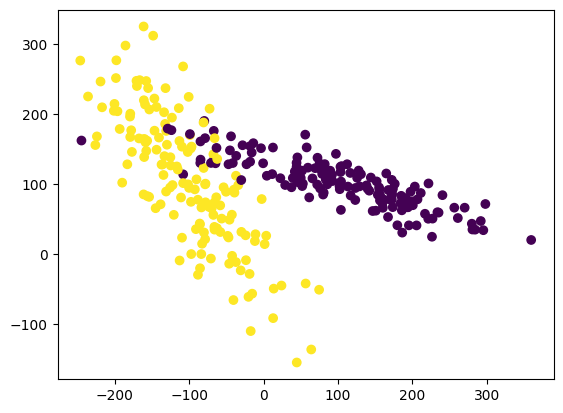

In [18]:
#生成具有2种属性的300笔数据
X, y = make_classification(
    n_samples=300, n_features=2,
    n_redundant=0, n_informative=2,
    random_state=22, n_clusters_per_class=1,
    scale=100)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
clf = SVC()
clf.fit(X_train, y_train)
print(clf.score(X_test, y_test))

0.9444444444444444


In [20]:
X = preprocessing.scale(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
clf = SVC()
clf.fit(X_train, y_train)
print(clf.score(X_test, y_test))

0.9777777777777777


交叉验证

In [21]:
from sklearn.model_selection import cross_val_score

iris = load_iris()
X = iris.data
y = iris.target
print(X.shape)
print(y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=4)
# K最近邻(kNN，k-NearestNeighbor)分类算法
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print(knn.score(X_test, y_test))

(150, 4)
(150,)
0.9736842105263158


In [22]:
acc_scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy')
print(acc_scores)
print(acc_scores.mean())

[0.96666667 1.         0.93333333 0.96666667 1.        ]
0.9733333333333334


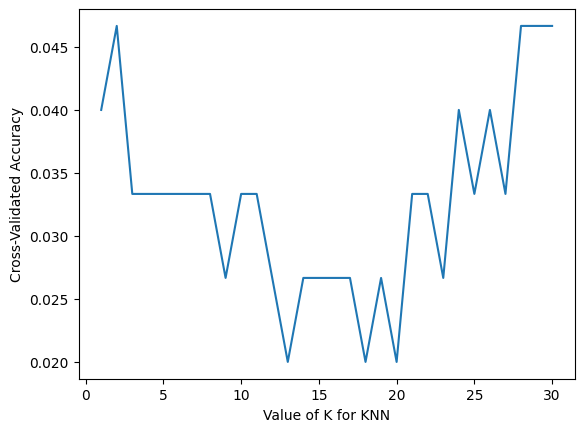

In [23]:
k_range = range(1, 31)

k_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    # https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
    # scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    # k_scores.append(scores.mean())
    loss = -cross_val_score(knn, X, y, cv=10, scoring='neg_mean_squared_error')
    k_scores.append(loss.mean())

#可视化数据
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

学习曲线

通过画出不同训练集大小时训练集和交叉验证的准确率，可以看到模型在新数据上的表现，进而来判断模型是否方差偏高或偏差过高，以及增大训练集是否可以减小过拟合。

In [24]:
from sklearn.model_selection import learning_curve

digits = load_digits()
X = digits.data
y = digits.target
print(X)
print(X.shape)
print(y)
print(y.shape)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
(1797, 64)
[0 1 2 ... 8 9 8]
(1797,)


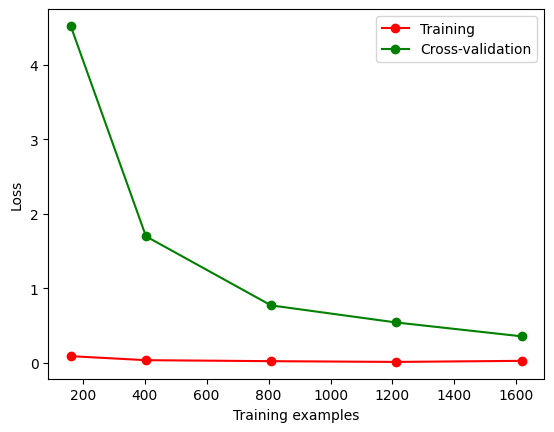

In [25]:
train_sizes, train_loss, test_loss = learning_curve(
    SVC(gamma=0.001), X, y, cv=10, scoring='neg_mean_squared_error', train_sizes=[0.1, 0.25, 0.5, 0.75, 1])

# 平均每一轮所得到的平均方差(共5轮，分别为样本10%、25%、50%、75%、100%)
train_loss_mean = -np.mean(train_loss, axis=1)
test_loss_mean = -np.mean(test_loss, axis=1)

plt.plot(train_sizes, train_loss_mean, 'o-', color="r", label="Training")
plt.plot(train_sizes, test_loss_mean, 'o-', color="g", label="Cross-validation")

plt.xlabel("Training examples")
plt.ylabel("Loss")
plt.legend(loc="best")
plt.show()


验证曲线

验证曲线的横轴为某个超参数，从验证曲线上可以看到随着超参数设置的改变，模型可能从欠拟合到合适，再到过拟合的过程，进而选择一个合适的位置，来提高模型的性能。

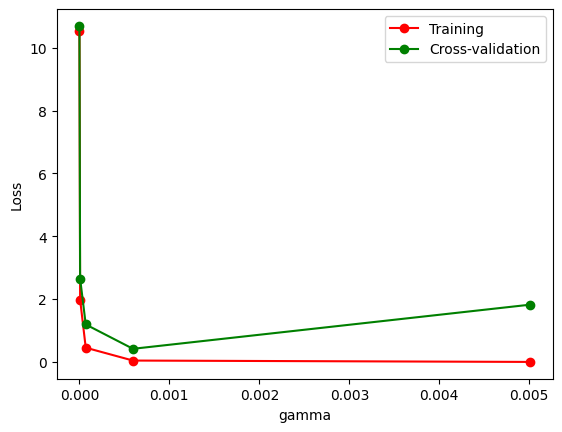

In [26]:
from sklearn.model_selection import validation_curve

param_range = np.logspace(-6, -2.3, 5)

#使用validation_curve快速找出参数对模型的影响
train_loss, test_loss = validation_curve(
    SVC(), X, y, param_name='gamma', param_range=param_range, cv=10, scoring='neg_mean_squared_error')

#平均每一轮的平均方差
train_loss_mean = -np.mean(train_loss, axis=1)
test_loss_mean = -np.mean(test_loss, axis=1)

#可视化图形
plt.plot(param_range, train_loss_mean, 'o-', color="r", label="Training")
plt.plot(param_range, test_loss_mean, 'o-', color="g", label="Cross-validation")
plt.xlabel("gamma")
plt.ylabel("Loss")
plt.legend(loc="best")
plt.show()

使用 pickle 保存模型

In [112]:
import pickle

with open('clf.pickle', 'wb') as f:
    pickle.dump(knn, f)

# 读取Model
with open('clf.pickle', 'rb') as f:
    knn2 = pickle.load(f)
    #测试读取后的 Model
    print(knn2.predict(X))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1
 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 1 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


使用 joblib 保存模型

joblib在使用上比较容易，读取速度也相对pickle快

In [118]:
import joblib

# 保存Model(注:save文件夹要预先建立，否则会报错)
joblib.dump(knn, 'clf.pkl')

# 读取Model
knn3 = joblib.load('clf.pkl')

# 测试读取后的Model
print(knn3.predict(X))


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1
 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 1 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
